# Pandas

In [3]:
import pandas as pd

h = ('AA',"2012-02-01",100,10.2)
#Series()를 활용하여 시리즈로 변환함
s=pd.Series(h)
s

0            AA
1    2012-02-01
2           100
3          10.2
dtype: object

In [5]:
d = {"name":"IBM", "date":"2010-09-25", "shares":100, "price":10.2}
d_pd=pd.Series(d)
d_pd

name             IBM
date      2010-09-25
shares           100
price           10.2
dtype: object

In [8]:
f= ["FB","2001-08-02",90,3.2]
f=pd.Series(f, index=["name","date","shares","price"])
f

name              FB
date      2001-08-02
shares            90
price            3.2
dtype: object

In [9]:
f["shares"]

90

In [10]:
f[0]

'FB'

In [11]:
f[["shares","price"]]

shares     90
price     3.2
dtype: object

## DataFrame

In [12]:
data = {"name":["AA","IBM","GOOG"],
       "date":["2001-02-18","2012-02-15","2010-04-08"],
       "shares":[100,30,20],
       "price":[12.3,10.3,32.2]}

df=pd.DataFrame(data)
df

,name,date,shares,price
0,AA,2001-02-18,100,12.3
1,IBM,2012-02-15,30,10.3
2,GOOG,2010-04-08,20,32.2


In [25]:
df["Owner"]="Unkown"
df

,date,shares,price,Owner
name,,,,
AA,2001-02-18,100,12.3,Unkown
IBM,2012-02-15,30,10.3,Unkown
GOOG,2010-04-08,20,32.2,Unkown


In [15]:
#인덱스 값 변형
df.index=["one","two","three"]
df

,name,date,shares,price,Owner
one,AA,2001-02-18,100,12.3,Unkown
two,IBM,2012-02-15,30,10.3,Unkown
three,GOOG,2010-04-08,20,32.2,Unkown


In [16]:
df=df.set_index(["name"]) #name을 속성으로 사용하여 변형
df

,date,shares,price,Owner
name,,,,
AA,2001-02-18,100,12.3,Unkown
IBM,2012-02-15,30,10.3,Unkown
GOOG,2010-04-08,20,32.2,Unkown


In [17]:
df['shares']

name
AA      100
IBM      30
GOOG     20
Name: shares, dtype: int64

In [26]:
#삭제하기 del 또는 drop
del df["Owner"]
df

,date,shares,price
name,,,
AA,2001-02-18,100,12.3
IBM,2012-02-15,30,10.3
GOOG,2010-04-08,20,32.2


In [27]:
df.drop("shares",axis=1) #axis=1방향으로 전체 삭제하기

,date,price
name,,
AA,2001-02-18,12.3
IBM,2012-02-15,10.3
GOOG,2010-04-08,32.2


# Overview

In [1]:
import pandas as pd

casts=pd.read_csv("C:/Users/pc/Main/Data_Analysis/pandas_data/data/cast.csv", index_col=None)
casts.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [2]:
titles=pd.read_csv("C:/Users/pc/Main/Data_Analysis/pandas_data/data/titles.csv", index_col=None) #인덱스 없음..첫번쨰 열이.데이터
titles.tail()

,title,year
49995,Rebel,1970
49996,Suzanne,1996
49997,Bomba,2013
49998,Aao Jao Ghar Tumhara,1984
49999,Mrs. Munck,1995


In [32]:
t=titles["title"] #제목만 추출
t.head()

0             The Rising Son
1    The Thousand Plane Raid
2           Crucea de piatra
3                    Country
4                 Gaiking II
Name: title, dtype: object

In [37]:
#Filter Data
after85=titles[titles["year"]>1985] #연도가 1985보다 높은 것
after85.head()

,title,year
0,The Rising Son,1990
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011
5,Medusa (IV),2015


In [40]:
t=titles
condition=(t["year"]>=1990) & (t["year"]<2000)
t[condition].head()

,title,year
0,The Rising Son,1990
2,Crucea de piatra,1993
12,Poka Makorer Ghar Bosoti,1996
19,Maa Durga Shakti,1999
24,Conflict of Interest,1993


In [42]:
#정렬하기 Sorting
condition=t["title"]=="Macbeth"
t[condition]

,title,year
4226,Macbeth,1913
9322,Macbeth,2006
11722,Macbeth,2013
17166,Macbeth,1997
25847,Macbeth,1998


In [43]:
t[condition].sort_index() #인덱스 별로 정렬함

,title,year
4226,Macbeth,1913
9322,Macbeth,2006
11722,Macbeth,2013
17166,Macbeth,1997
25847,Macbeth,1998


In [45]:
t[condition].sort_values("year") #year 값의 순서대로 정렬함

,title,year
4226,Macbeth,1913
17166,Macbeth,1997
25847,Macbeth,1998
9322,Macbeth,2006
11722,Macbeth,2013


## NULL Values

다양한 열에는 일반적으로 NaN으로 채워지는 값이 없을 수 있음.

In [48]:
casts[3:5]

,title,year,name,type,character,n
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [49]:
#isnull()은 null값이 있는 경우 True를 반환함.
c=casts
c["n"].isnull().head()

0    False
1    False
2    False
3     True
4     True
Name: n, dtype: bool

In [52]:
condition=c["n"].isnull()
c[condition].head()

,title,year,name,type,character,n
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN


In [53]:
#notnull()은 isnull()의 반대

c["n"].notnull().head() #NULL값이 아닌 것을 True로 반환함

0     True
1     True
2     True
3    False
4    False
Name: n, dtype: bool

In [58]:
conditon=c["n"].isnull()
c[condition].head(3)

,title,year,name,type,character,n
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN


In [64]:
#데이터 준비
import numpy as np
df_1 = pd.DataFrame(dict(age=[np.NaN, np.NaN, 6],
                   born=[pd.NaT, pd.Timestamp('1939-05-27'),
                         pd.Timestamp('1940-04-25')],
                   name=[np.NaN, 'Batman', ''],
                   toy=[None, 'Batmobile', 'Joker']))
df_1

,age,born,name,toy
0,NaN,NaT,NaN,None
1,NaN,1939-05-27,Batman,Batmobile
2,6.0,1940-04-25,,Joker


In [65]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   age     1 non-null      float64       
 1   born    2 non-null      datetime64[ns]
 2   name    2 non-null      object        
 3   toy     2 non-null      object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 224.0+ bytes


In [67]:
#isna() :  null인 데이터는 True, 아니면 False를 반환
df_1[df_1.age.isna()]

,age,born,name,toy
0,NaN,NaT,NaN,None
1,NaN,1939-05-27,Batman,Batmobile


In [68]:
df_1

,age,born,name,toy
0,NaN,NaT,NaN,None
1,NaN,1939-05-27,Batman,Batmobile
2,6.0,1940-04-25,,Joker


In [69]:
#dropna() null이 존재하는 데이터를 삭제함
#DataFrame.dropna(axis=0, how="any", thresh=None, subset=None, inplace=False)
df_1.dropna()

,age,born,name,toy
2,6.0,1940-04-25,,Joker


In [70]:
df_1.dropna(subset=["age"]) #age가 null인 데이터를 모두 지운다

,age,born,name,toy
2,6.0,1940-04-25,,Joker


In [60]:
condition=c["n"].isnull()#NaN 값은 NA로 대체됨
c_fill=c[condition].fillna('NA') #True인 해당 열을 "NA"로 대체함
c_fill.head()

,title,year,name,type,character,n
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NA
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NA
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NA
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NA
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NA


In [71]:
#삭제 후 인덱스 재처리
df_1.reset_index()

,index,age,born,name,toy
0,0,NaN,NaT,NaN,None
1,1,NaN,1939-05-27,Batman,Batmobile
2,2,6.0,1940-04-25,,Joker


In [72]:
df_1.reset_index(drop=True)

,age,born,name,toy
0,NaN,NaT,NaN,None
1,NaN,1939-05-27,Batman,Batmobile
2,6.0,1940-04-25,,Joker


## String operation

In [74]:
t = titles
condition=titles["title"]=="Maa"
t[condition]

,title,year
38880,Maa,1968


In [76]:
## Maa로 시작하는 모든 영화를 검색함.
condition=t["title"].str.startswith("Maa")
t[condition].head(3)

,title,year
19,Maa Durga Shakti,1999
334,Maarek hob,2004
3046,Maa Aur Mamta,1970


In [91]:
# 실습예제
df_2 = pd.DataFrame({'email':['happy@gmail.com', \
                            '1004@NAVER.COM', \
                            'manse@yahoo.co.kr']})
df_2

,email
0,happy@gmail.com
1,1004@NAVER.COM
2,manse@yahoo.co.kr


In [81]:
df_2["email_strip"]=df_2["email"].str.strip()
df_2["email_lstrip"]=df_2["email"].str.lstrip()
df_2["email_rstrip"]=df_2["email"].str.rstrip()
df_2

,email,email_strip,email_lstrip,email_rstrip
0,happy@gmail.com,happy@gmail.com,happy@gmail.com,happy@gmail.com
1,1004@NAVER.COM,1004@NAVER.COM,1004@NAVER.COM,1004@NAVER.COM
2,manse@yahoo.co.kr,manse@yahoo.co.kr,manse@yahoo.co.kr,manse@yahoo.co.kr


In [83]:
#  패딩, 고정길이 데이터를 이용해야 하는경우
df_2['email_pad']    = df_2['email'].str.pad(width=20, side='left', fillchar='_') # 지정길이 패딩
df_2['email_center'] = df_2['email'].str.center(width=20, fillchar='_') # 중앙놓고 지정길이 패딩
df_2['email_ljust']  = df_2['email'].str.ljust(width=20, fillchar='_')  # 왼쪽놓고 지정길이 패딩
df_2['email_rjust']  = df_2['email'].str.rjust(width=20, fillchar='_')  # 오른쪽놓고 지정길이 패딩
df_2['email_zfill']  = df_2['email'].str.zfill(width=20)                # 지정길이 0패딩
df_2

,email,email_strip,email_lstrip,email_rstrip,email_pad,email_center,email_ljust,email_rjust,email_zfill
0,happy@gmail.com,happy@gmail.com,happy@gmail.com,happy@gmail.com,_____happy@gmail.com,__happy@gmail.com___,happy@gmail.com_____,_____happy@gmail.com,00000happy@gmail.com
1,1004@NAVER.COM,1004@NAVER.COM,1004@NAVER.COM,1004@NAVER.COM,______1004@NAVER.COM,___1004@NAVER.COM___,1004@NAVER.COM______,______1004@NAVER.COM,0000001004@NAVER.COM
2,manse@yahoo.co.kr,manse@yahoo.co.kr,manse@yahoo.co.kr,manse@yahoo.co.kr,___manse@yahoo.co.kr,_manse@yahoo.co.kr__,manse@yahoo.co.kr___,___manse@yahoo.co.kr,000manse@yahoo.co.kr


In [85]:
#분할, 구분자를 이용하여 새로운 컬럼을 생성함
df_2[["email_split_1","email.split_2"]]=df_2["email"].str.split('@', n=1, expand=True)
df_2

,email,email_strip,email_lstrip,email_rstrip,email_pad,email_center,email_ljust,email_rjust,email_zfill,email_split_1,email.split_2
0,happy@gmail.com,happy@gmail.com,happy@gmail.com,happy@gmail.com,_____happy@gmail.com,__happy@gmail.com___,happy@gmail.com_____,_____happy@gmail.com,00000happy@gmail.com,happy,gmail.com
1,1004@NAVER.COM,1004@NAVER.COM,1004@NAVER.COM,1004@NAVER.COM,______1004@NAVER.COM,___1004@NAVER.COM___,1004@NAVER.COM______,______1004@NAVER.COM,0000001004@NAVER.COM,1004,NAVER.COM
2,manse@yahoo.co.kr,manse@yahoo.co.kr,manse@yahoo.co.kr,manse@yahoo.co.kr,___manse@yahoo.co.kr,_manse@yahoo.co.kr__,manse@yahoo.co.kr___,___manse@yahoo.co.kr,000manse@yahoo.co.kr,manse,yahoo.co.kr


In [86]:
# partition(): 좌측에 먼저 출현한 구분자포함 3개로 나눈다
df_2[['email_partition_1', 'email_partition_2', 'email_partition_3']] = df_2['email'].str.partition(sep='@')

# rpartition(): 우측에 먼저 출현한 구분자포함 3개로 나눈다
df_2[['email_rpartition_1','email_rpartition_2', 'email_rpartition_3']] = df_2['email'].str.rpartition(sep='@')

# rsplit(): split와 동일하며 우측부터 탐색하며 n개로 나눈다
df_2['email_rsplit_1'] = df_2['email'].str.rsplit(pat='@')
df_2

,email,email_strip,email_lstrip,email_rstrip,email_pad,email_center,email_ljust,email_rjust,email_zfill,email_split_1,email.split_2,email_partition_1,email_partition_2,email_partition_3,email_rpartition_1,email_rpartition_2,email_rpartition_3,email_rsplit_1
0,happy@gmail.com,happy@gmail.com,happy@gmail.com,happy@gmail.com,_____happy@gmail.com,__happy@gmail.com___,happy@gmail.com_____,_____happy@gmail.com,00000happy@gmail.com,happy,gmail.com,happy,@,gmail.com,happy,@,gmail.com,"[happy, gmail.com]"
1,1004@NAVER.COM,1004@NAVER.COM,1004@NAVER.COM,1004@NAVER.COM,______1004@NAVER.COM,___1004@NAVER.COM___,1004@NAVER.COM______,______1004@NAVER.COM,0000001004@NAVER.COM,1004,NAVER.COM,1004,@,NAVER.COM,1004,@,NAVER.COM,"[1004, NAVER.COM]"
2,manse@yahoo.co.kr,manse@yahoo.co.kr,manse@yahoo.co.kr,manse@yahoo.co.kr,___manse@yahoo.co.kr,_manse@yahoo.co.kr__,manse@yahoo.co.kr___,___manse@yahoo.co.kr,000manse@yahoo.co.kr,manse,yahoo.co.kr,manse,@,yahoo.co.kr,manse,@,yahoo.co.kr,"[manse, yahoo.co.kr]"


In [87]:
df_2['email_lower']      = df_2['email'].str.lower()      # 모두 소문자로 변경
df_2['email_upper']      = df_2['email'].str.upper()      # 모두 대문자로 변경
df_2['email_capitalize'] = df_2['email'].str.capitalize() # 앞문자 대문자로 변경
df_2['email_title']      = df_2['email'].str.title()      # 단위별 앞문자 대문자로 변경
df_2['email_swapcase']   = df_2['email'].str.swapcase()   # 소문자는 대문자, 대문자는 소문자로 변경 

# 입력 패턴 또는 글자를 대체, 예제에서는 .을 _로 변경
df_2['email_replace']    = df_2['email'].str.replace(pat='.', repl='_', regex=False)
df_2

,email,email_strip,email_lstrip,email_rstrip,email_pad,email_center,email_ljust,email_rjust,email_zfill,email_split_1,...,email_rpartition_1,email_rpartition_2,email_rpartition_3,email_rsplit_1,email_lower,email_upper,email_capitalize,email_title,email_swapcase,email_replace
0,happy@gmail.com,happy@gmail.com,happy@gmail.com,happy@gmail.com,_____happy@gmail.com,__happy@gmail.com___,happy@gmail.com_____,_____happy@gmail.com,00000happy@gmail.com,happy,...,happy,@,gmail.com,"[happy, gmail.com]",happy@gmail.com,HAPPY@GMAIL.COM,Happy@gmail.com,Happy@Gmail.Com,HAPPY@GMAIL.COM,happy@gmail_com
1,1004@NAVER.COM,1004@NAVER.COM,1004@NAVER.COM,1004@NAVER.COM,______1004@NAVER.COM,___1004@NAVER.COM___,1004@NAVER.COM______,______1004@NAVER.COM,0000001004@NAVER.COM,1004,...,1004,@,NAVER.COM,"[1004, NAVER.COM]",1004@naver.com,1004@NAVER.COM,1004@naver.com,1004@Naver.Com,1004@naver.com,1004@NAVER_COM
2,manse@yahoo.co.kr,manse@yahoo.co.kr,manse@yahoo.co.kr,manse@yahoo.co.kr,___manse@yahoo.co.kr,_manse@yahoo.co.kr__,manse@yahoo.co.kr___,___manse@yahoo.co.kr,000manse@yahoo.co.kr,manse,...,manse,@,yahoo.co.kr,"[manse, yahoo.co.kr]",manse@yahoo.co.kr,MANSE@YAHOO.CO.KR,Manse@yahoo.co.kr,Manse@Yahoo.Co.Kr,MANSE@YAHOO.CO.KR,manse@yahoo_co_kr


In [88]:
#문자열의 위치를 반환함
df_2['email_find']    = df_2['email'].str.find(sub='.')           # 왼쪽부터 sub값 검색후 위치반환

In [89]:
df_2

,email,email_strip,email_lstrip,email_rstrip,email_pad,email_center,email_ljust,email_rjust,email_zfill,email_split_1,...,email_rpartition_2,email_rpartition_3,email_rsplit_1,email_lower,email_upper,email_capitalize,email_title,email_swapcase,email_replace,email_find
0,happy@gmail.com,happy@gmail.com,happy@gmail.com,happy@gmail.com,_____happy@gmail.com,__happy@gmail.com___,happy@gmail.com_____,_____happy@gmail.com,00000happy@gmail.com,happy,...,@,gmail.com,"[happy, gmail.com]",happy@gmail.com,HAPPY@GMAIL.COM,Happy@gmail.com,Happy@Gmail.Com,HAPPY@GMAIL.COM,happy@gmail_com,11
1,1004@NAVER.COM,1004@NAVER.COM,1004@NAVER.COM,1004@NAVER.COM,______1004@NAVER.COM,___1004@NAVER.COM___,1004@NAVER.COM______,______1004@NAVER.COM,0000001004@NAVER.COM,1004,...,@,NAVER.COM,"[1004, NAVER.COM]",1004@naver.com,1004@NAVER.COM,1004@naver.com,1004@Naver.Com,1004@naver.com,1004@NAVER_COM,10
2,manse@yahoo.co.kr,manse@yahoo.co.kr,manse@yahoo.co.kr,manse@yahoo.co.kr,___manse@yahoo.co.kr,_manse@yahoo.co.kr__,manse@yahoo.co.kr___,___manse@yahoo.co.kr,000manse@yahoo.co.kr,manse,...,@,yahoo.co.kr,"[manse, yahoo.co.kr]",manse@yahoo.co.kr,MANSE@YAHOO.CO.KR,Manse@yahoo.co.kr,Manse@Yahoo.Co.Kr,MANSE@YAHOO.CO.KR,manse@yahoo_co_kr,11


In [90]:
# 문자열의 특정 위치의 값 또는 슬라이싱을 통해 자르거나 자른 내용을 치환함
df_2['email_get']           = df_2['email'].str.get(i=0)    # 지정 위치값 반환
df_2['email_slice']         = df_2['email'].str.slice(start=0, stop=5) # 인덱스 사이 값 반환

# 인덱스 사이 값을 다른 값으로 바꾼 후 값 반환
df_2['email_slice_replace'] = df_2['email'].str.slice_replace(start=0, stop=5, repl='?')
df_2

,email,email_strip,email_lstrip,email_rstrip,email_pad,email_center,email_ljust,email_rjust,email_zfill,email_split_1,...,email_lower,email_upper,email_capitalize,email_title,email_swapcase,email_replace,email_find,email_get,email_slice,email_slice_replace
0,happy@gmail.com,happy@gmail.com,happy@gmail.com,happy@gmail.com,_____happy@gmail.com,__happy@gmail.com___,happy@gmail.com_____,_____happy@gmail.com,00000happy@gmail.com,happy,...,happy@gmail.com,HAPPY@GMAIL.COM,Happy@gmail.com,Happy@Gmail.Com,HAPPY@GMAIL.COM,happy@gmail_com,11,h,happy,?@gmail.com
1,1004@NAVER.COM,1004@NAVER.COM,1004@NAVER.COM,1004@NAVER.COM,______1004@NAVER.COM,___1004@NAVER.COM___,1004@NAVER.COM______,______1004@NAVER.COM,0000001004@NAVER.COM,1004,...,1004@naver.com,1004@NAVER.COM,1004@naver.com,1004@Naver.Com,1004@naver.com,1004@NAVER_COM,10,1,1004@,?NAVER.COM
2,manse@yahoo.co.kr,manse@yahoo.co.kr,manse@yahoo.co.kr,manse@yahoo.co.kr,___manse@yahoo.co.kr,_manse@yahoo.co.kr__,manse@yahoo.co.kr___,___manse@yahoo.co.kr,000manse@yahoo.co.kr,manse,...,manse@yahoo.co.kr,MANSE@YAHOO.CO.KR,Manse@yahoo.co.kr,Manse@Yahoo.Co.Kr,MANSE@YAHOO.CO.KR,manse@yahoo_co_kr,11,m,manse,?@yahoo.co.kr


In [92]:
df_2['email_isalnum']   = df_2['email'].str.isalnum()   # 알파벳 또는 숫자로만 구성 여부
df_2['email_isalpha']   = df_2['email'].str.isalpha()   # 알파벳으로만 구성 여부
df_2['email_isdecimal'] = df_2['email'].str.isdecimal() # 숫자문자로만 구성 여부
df_2['email_isdigit']   = df_2['email'].str.isdigit()   # 숫자문자로만 구성 여부
df_2['email_islower']   = df_2['email'].str.islower()   # 소문자로만 구성 여부
df_2['email_isnumeric'] = df_2['email'].str.isnumeric() # 숫자문자로만 구성 여부
df_2['email_isspace']   = df_2['email'].str.isspace()   # 공백(Whitespace)으로만 구성 여부
df_2['email_istitle']   = df_2['email'].str.istitle()   # TitleCase형태로 구성 여부
df_2['email_isupper']   = df_2['email'].str.isupper()   # 대문자로만 구성 여부
df_2

,email,email_isalnum,email_isalpha,email_isdecimal,email_isdigit,email_islower,email_isnumeric,email_isspace,email_istitle,email_isupper
0,happy@gmail.com,False,False,False,False,True,False,False,False,False
1,1004@NAVER.COM,False,False,False,False,False,False,False,False,True
2,manse@yahoo.co.kr,False,False,False,False,True,False,False,False,False


## Count Value

총 발생 횟수는 'value_counts()' 옵션을 사용하여 계산

In [93]:
#각 연도를 기준으로 하는 총 영화 수를 표시함
t["year"].value_counts().head()

2016    2363
2017    2138
2015    1849
2014    1701
2013    1609
Name: year, dtype: int64

# Plot
Pandas는 matplotlib 라이브러리를 지원하며 데이터를 그리는 데에도 사용

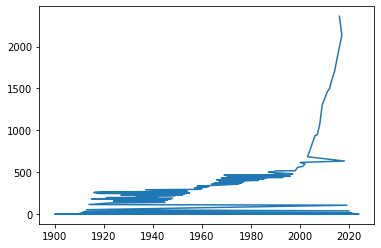

In [100]:
import matplotlib.pyplot as plt
t = titles
p=t["year"].value_counts() #연도별 총 영화 수
p.plot()
plt.show() #정렬이 필요함

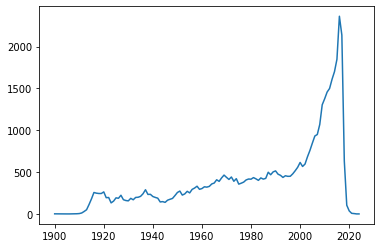

In [97]:
# 먼저 연도(즉, 인덱스)를 정렬한 다음 데이터를 아래와 같이 플롯함
줄거리는 영화의 수가 매년 증가하고 있음을 보여
p.sort_index().plot()
plt.show()

## Groupby

데이터는 열의 headers로 그룹화할 수 있음
 - Count Values에서는 ‘count_values()' 메서드를 사용하여 영화/연도 값을 계산
 - 'groupby' 방식으로도 동일하게 구현할 수 있음

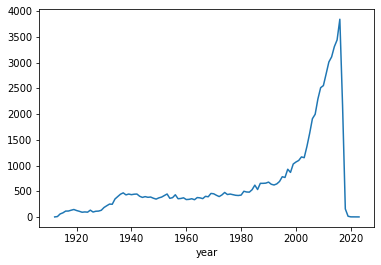

In [102]:
cg=c.groupby(["year"]).size()
cg.plot()
plt.show()

In [104]:
# 연도를 기준으로 배우 'Aaron Abrams'의 영화를 그룹화
c = casts
condition=c["name"]=="Aaron Abrams"
cf=c[condition]
cf.groupby(["year"]).size().head() #연도를 기준으로 그룹화함

year
2003    2
2004    2
2005    2
2006    1
2007    2
dtype: int64

In [105]:
#영화목록도 함계 보고 싶은 경우..
cf.groupby(["year","title"]).size().head()

year  title                               
2003  The In-Laws                             1
      The Visual Bible: The Gospel of John    1
2004  Resident Evil: Apocalypse               1
      Siblings                                1
2005  Cinderella Man                          1
dtype: int64

In [106]:
# 항목을 연도별로 그룹화하고 해당 연도의 최대 등급을 구현함
c.groupby(["year"]).n.max().head()

year
1912     6.0
1913    14.0
1914    39.0
1915    14.0
1916    35.0
Name: n, dtype: float64

In [107]:
#최소등급
c.groupby(["year"]).n.min().head()

year
1912    6.0
1913    1.0
1914    1.0
1915    1.0
1916    1.0
Name: n, dtype: float64

In [108]:
#매년 등급 확인
c.groupby(["year"]).n.mean().head()

year
1912    6.000000
1913    4.142857
1914    7.085106
1915    4.236111
1916    5.037736
Name: n, dtype: float64

In [110]:
#수십 년을 기준으로 데이터를 그룹화하고 사용자 지정 groupby 필드를 생성함
decade = c["year"]//10*10
c_ded = c.groupby(decade).n.size() #10년 단위로 구분함
c_ded.head()

year
1910     669
1920    1121
1930    3448
1940    3997
1950    3892
Name: n, dtype: int64

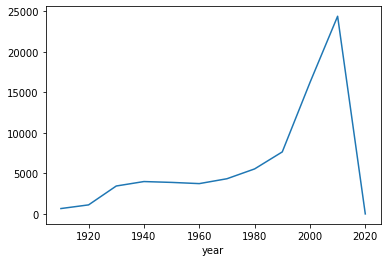

In [111]:
#10년단위의 시각화
c_ded.plot()
plt.show()

## Unstack

In [3]:
c= casts
#데이터는 10년 및 유형(예: actor and actress)별로 그룹화
c.groupby([c["year"]//10*10, 'type']).size().head(8)

year  type   
1910  actor       384
      actress     285
1920  actor       710
      actress     411
1930  actor      2628
      actress     820
1940  actor      3014
      actress     983
dtype: int64

In [14]:
#  각 10년의 배우와 여배우의 총 수를 비교하고 플롯하려고 함
c_decade = c.groupby(["type", c["year"]//10*10]).size()

#'unstack' 명령을 사용하여 새로운 DataFrame을 생성하고, 'unstack' 명령은 인덱스를 기반으로 새로운 DataFrame을 생성
c_decade.unstack() #0을 넣으면 나란히 표시됨.

year,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020
type,,,,,,,,,,,,
actor,384,710,2628,3014,2877,2775,3044,3565,5108,10368,15523,4
actress,285,411,820,983,1015,968,1299,1989,2544,5831,8853,3


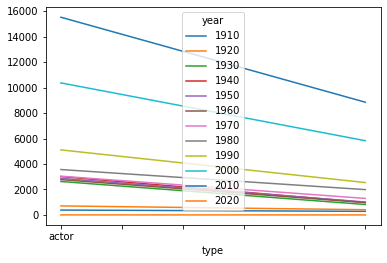

In [7]:
import matplotlib.pyplot as plt
c_decade.unstack().plot()
plt.show()

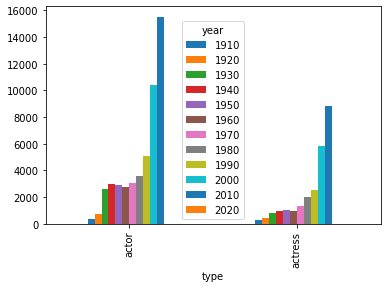

In [12]:
c_decade.unstack().plot(kind="bar")
plt.show()

In [15]:
c_decade.unstack(0)

type,actor,actress
year,,
1910,384,285
1920,710,411
1930,2628,820
1940,3014,983
1950,2877,1015
1960,2775,968
1970,3044,1299
1980,3565,1989
1990,5108,2544


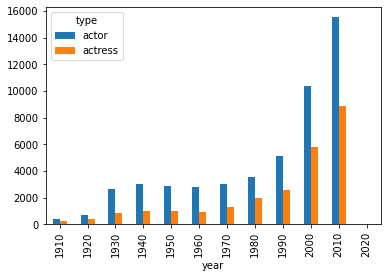

In [13]:
c_decade.unstack(0).plot(kind="bar")
plt.show()

## Merge (파일 결합)

In [17]:
# Merge with different files
release = pd.read_csv("C:/Users/pc/Main/Data_Analysis/pandas_data/data/release_dates.csv", index_col=None)

#'release_dates.csv' 파일에는 여러 국가의 영화 개봉일이 포함
release.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#Beings,2015,Romania,2015-01-29
2,#Declimax,2018,Netherlands,2018-01-21
3,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
4,#Horror,2015,USA,2015-11-20


In [18]:
casts.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [19]:
#영화 'Amelia' 개봉일을 알아보자
c_amelia = casts[casts["title"]=="Amelia"]
c_amelia.head()

,title,year,name,type,character,n
5767,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0
23319,Amelia,2009,Jeremy Akerman,actor,Sheriff,19.0


In [20]:
release[release["title"]=="Amelia"].head()

,title,year,country,date
20543,Amelia,1966,Mexico,1966-03-10
20544,Amelia,2009,Canada,2009-10-23
20545,Amelia,2009,USA,2009-10-23
20546,Amelia,2009,Australia,2009-11-12
20547,Amelia,2009,Singapore,2009-11-12


In [21]:
# cast DataFrame에 Amelia-1966에 대한 항목이 없으므로 merge 명령은 Amelia-1966 release 데이터의 날짜를 병합하지 않음

c_amelia.merge(release).head() #1966의 내용은 담지 않음

,title,year,name,type,character,n,country,date
0,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0,Canada,2009-10-23
1,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0,USA,2009-10-23
2,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0,Australia,2009-11-12
3,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0,Singapore,2009-11-12
4,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0,Ireland,2009-11-13


##  Merge table with itself

영화의 공동 배우 목록을 보고 싶을떄, 제목과 연도를 기준으로 테이블을 자체적으로 병합해야 함

In [23]:
condition=casts["name"]=="Aaron Abrams"
c=casts[condition]
c.head(2)

,title,year,name,type,character,n
5765,#FromJennifer,2017,Aaron Abrams,actor,Ralph Sinclair,NaN
5766,388 Arletta Avenue,2011,Aaron Abrams,actor,Alex,4.0


In [25]:
#공동 주연을 찾으려면 '제목'과 '연도'를 기준으로 DataFrame을 자체적으로 병합
c.merge(casts, on=["title", "year"]).head() #문제점...Aaron Abrams'도 그의 공동 배우로 표시됨..

,title,year,name_x,type_x,character_x,n_x,name_y,type_y,character_y,n_y
0,#FromJennifer,2017,Aaron Abrams,actor,Ralph Sinclair,NaN,Aaron Abrams,actor,Ralph Sinclair,NaN
1,#FromJennifer,2017,Aaron Abrams,actor,Ralph Sinclair,NaN,Christian Ackerman,actor,Simon,NaN
2,388 Arletta Avenue,2011,Aaron Abrams,actor,Alex,4.0,Graham Abbey,actor,Officer #2,8.0
3,388 Arletta Avenue,2011,Aaron Abrams,actor,Alex,4.0,Aaron Abrams,actor,Alex,4.0
4,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0,Aaron Abrams,actor,Slim Gordon,8.0


In [27]:
c_costar=c.merge(casts, on=["title", "year"])
c_costar=c_costar[c_costar["name_y"]=="Aaron Abrams"]
c_costar.head()

,title,year,name_x,type_x,character_x,n_x,name_y,type_y,character_y,n_y
0,#FromJennifer,2017,Aaron Abrams,actor,Ralph Sinclair,NaN,Aaron Abrams,actor,Ralph Sinclair,NaN
3,388 Arletta Avenue,2011,Aaron Abrams,actor,Alex,4.0,Aaron Abrams,actor,Alex,4.0
4,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0,Aaron Abrams,actor,Slim Gordon,8.0
6,At Home by Myself... with You,2009,Aaron Abrams,actor,Guy,2.0,Aaron Abrams,actor,Guy,2.0
7,Cinderella Man,2005,Aaron Abrams,actor,1928 Fan,67.0,Aaron Abrams,actor,1928 Fan,67.0


# Index

인덱싱이 있는 데이터와 없는 데이터의 데이터 
액세스 시간을 비교

In [29]:
# Creating index

casts.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [34]:
%%timeit #'%%timeit'은 쉘을 여러 번 실행하고 평균 시간을 표시

casts[casts["title"]=="Macbeth"]

14.3 ms ± 2.65 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [35]:
# 'set_index'는 데이터에 대한 인덱스를 만드는 데 사용

#인덱스 정렬(인덱스를 정렬하면 속도가 더 빨라지기 때문에 인덱싱을 사용하여 성능이 향상)
c=casts.set_index(["title"])
c.head(4)

,year,name,type,character,n
title,,,,,
Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
Suuri illusioni,1985,Homo $,actor,Guests,22.0
Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN


In [37]:
%%timeit

c.loc["Macbeth"] #평균 3.87ms 걸리는 것이 확인(인덱스를 정렬하면 속도가 더 빨라지기 때문에 인덱싱을 사용하여 성능이 향상)

3.87 ms ± 272 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [38]:
#  인덱스를 정렬하고 필터 작업을 수행합
cs=casts.set_index(["title"]).sort_index()
cs.tail(4)

,year,name,type,character,n
title,,,,,
xXx: Return of Xander Cage,2017,Julie Abcede,actor,Catwalk Partiers,84.0
xXx: Return of Xander Cage,2017,Jeimi Abila,actress,Lazarus' Girls,64.0
xXx: Return of Xander Cage,2017,Wayne Ambrose,actor,Choir Members,34.0
xXx: State of the Union,2005,Robert Alonzo,actor,Guard,NaN


In [40]:
%%timeit

cs.loc['Macbeth'] #시간이 많이 단축 된 것을 확인함

112 µs ± 19.5 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
